In [4]:
!pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

import graphviz

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

In [18]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### According to the question, we have to use only Pclass, Sex, Age, SibSp, Parch & Fare to predict whether the passengers survived. Hence, dropping other columns.

In [19]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [21]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
# Find the missing values

df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         103
SibSp         0
Parch         0
Fare          0
dtype: int64

In [32]:
print(f'There are {df.isnull().sum().sum()} values')

There are 103 values


In [37]:
## Filling the null values with the median of the Age column.
median = df["Age"].median()
df['Age'] = df['Age'].fillna(median)

In [38]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  772 non-null    int64  
 1   Pclass    772 non-null    int64  
 2   Sex       772 non-null    object 
 3   Age       772 non-null    float64
 4   SibSp     772 non-null    int64  
 5   Parch     772 non-null    int64  
 6   Fare      772 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.2+ KB


In [42]:
# Find & Drop the duplicates

df = df.drop_duplicates()
df.duplicated().sum()

0

In [43]:
df["Survived"].value_counts()

0    453
1    319
Name: Survived, dtype: int64

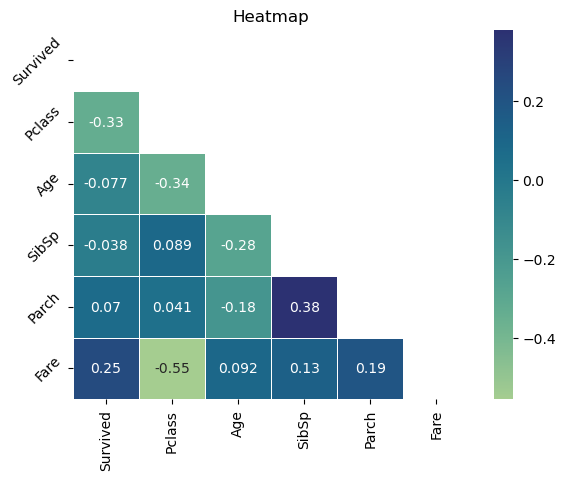

In [64]:
# Plot the correlation matrix

corr_map = df.corr()
mask = np.triu(corr_map)

sns.heatmap(corr_map, annot = True, cmap='crest', linewidth=0.5, mask=mask)
plt.title("Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Survival distribution based upon Sex')

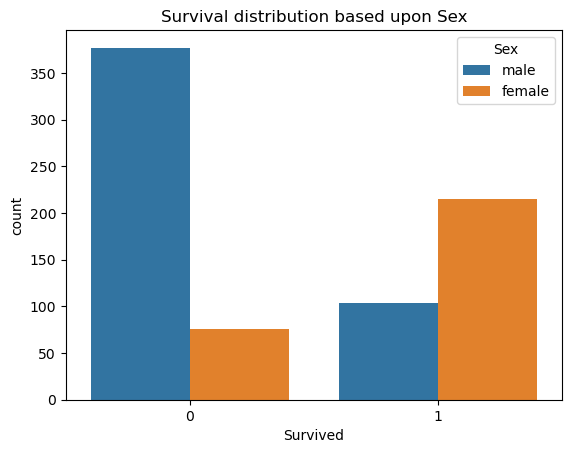

In [72]:
sns.countplot(data=df, x="Survived", hue="Sex")
plt.title("Survival distribution based upon Sex")


##### Female survivors are more than Male survivors.

(0.0, 1.0)

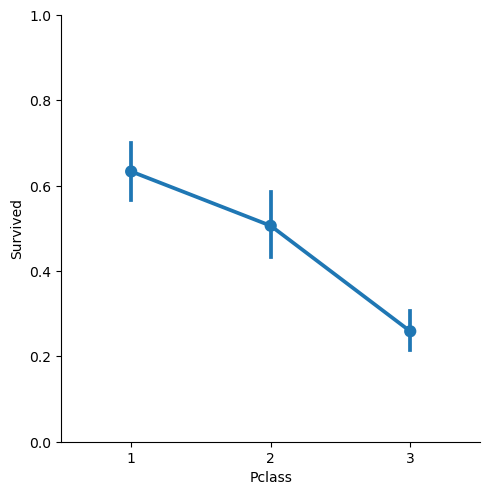

In [83]:
sns.catplot(data=df, x="Pclass", y="Survived", kind='point')
plt.ylim(0, 1)

(0.0, 1.0)

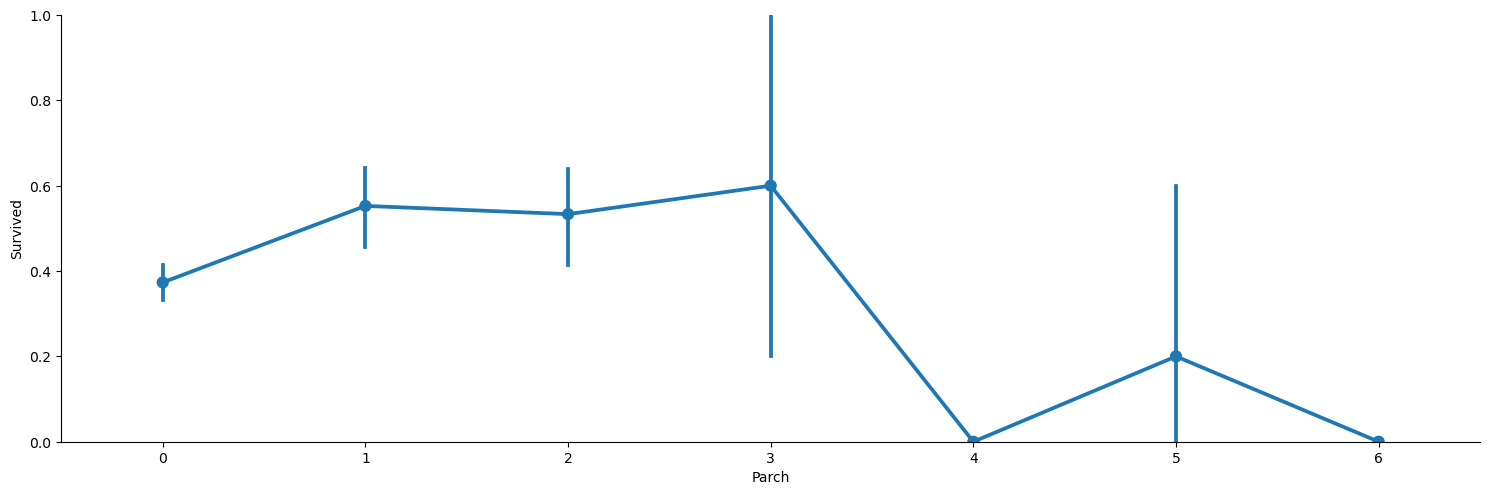

In [85]:
sns.catplot(data=df, x="Parch", y="Survived", kind='point', aspect=3)
plt.ylim(0, 1)

<AxesSubplot:xlabel='Age'>

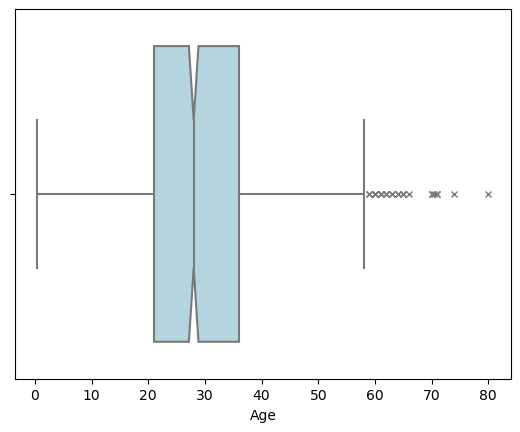

In [102]:
# Detecting Outliers
sns.boxplot(data=df, x="Age", color='lightblue', flierprops={"marker": "x"}, notch=True)


<AxesSubplot:xlabel='Fare'>

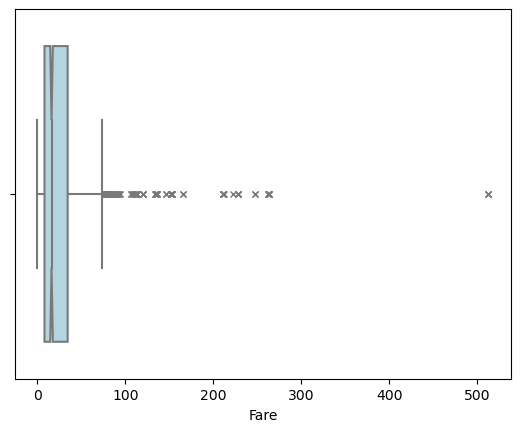

In [104]:
sns.boxplot(data=df, x="Fare", color='lightblue', flierprops={"marker": "x"}, notch=True)

In [110]:
def outlier(a):
    Q1 = a.quantile(0.25)
    Q3 = a.quantile(0.75)
    IQR =  Q1-Q3
    
    Lower_whis = Q1 - 1.5 * IQR
    Upper_whis = Q3 + 1.5 * IQR
    
    return np.clip(a, Lower_whis, Upper_whis)

In [113]:
df['Fare'] = outlier(df['Fare'])
df['Age']  = outlier(df['Age'])

<AxesSubplot:xlabel='Fare'>

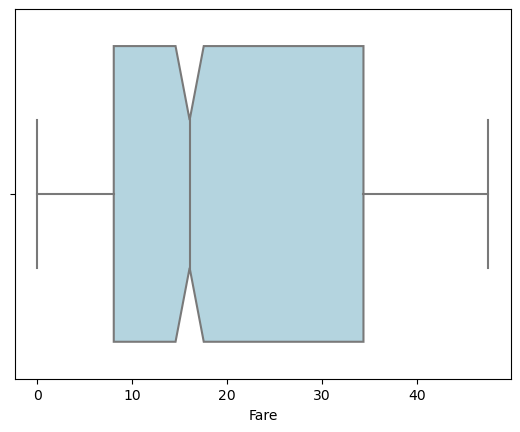

In [112]:
sns.boxplot(data=df, x="Fare", color='lightblue', flierprops={"marker": "x"}, notch=True)

<AxesSubplot:xlabel='Age'>

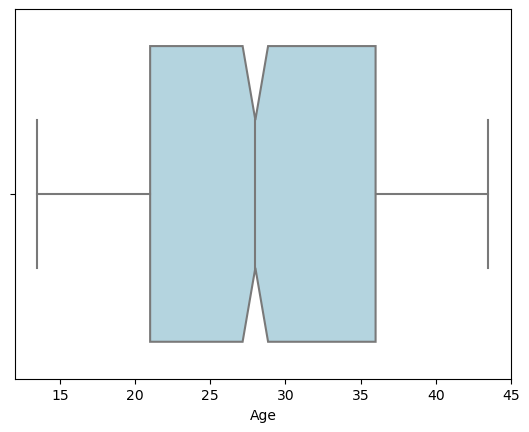

In [114]:
sns.boxplot(data=df, x="Age", color='lightblue', flierprops={"marker": "x"}, notch=True)

In [121]:
le_Sex = LabelEncoder()

df["Sex_n"] = le_Sex.fit_transform(df["Sex"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_n
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,47.5375,0
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,47.5375,0
4,0,3,male,35.0,0,0,8.0500,1


In [123]:
df = df.drop(["Sex"], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_n
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,47.5375,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,47.5375,0
4,0,3,35.0,0,0,8.0500,1


In [125]:
variables = df.drop(["Survived"], axis =1)
target = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.2, random_state=40)

In [133]:
model = tree.DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'X[5] <= 0.5\ngini = 0.483\nsamples = 617\nvalue = [366, 251]'),
 Text(0.25, 0.7, 'X[0] <= 2.5\ngini = 0.383\nsamples = 225\nvalue = [58, 167]'),
 Text(0.125, 0.5, 'X[4] <= 28.856\ngini = 0.12\nsamples = 125\nvalue = [8, 117]'),
 Text(0.0625, 0.3, 'X[4] <= 28.231\ngini = 0.208\nsamples = 51\nvalue = [6, 45]'),
 Text(0.03125, 0.1, 'gini = 0.18\nsamples = 50\nvalue = [5, 45]'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.3, 'X[3] <= 1.5\ngini = 0.053\nsamples = 74\nvalue = [2, 72]'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 62\nvalue = [0, 62]'),
 Text(0.21875, 0.1, 'gini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.375, 0.5, 'X[4] <= 22.904\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3125, 0.3, 'X[1] <= 16.5\ngini = 0.493\nsamples = 84\nvalue = [37, 47]'),
 Text(0.28125, 0.1, 'gini = 0.346\nsamples = 18\nvalue = [4, 14]'),
 Text(0.34375, 0.1, 'gini = 0.5\nsamples = 66\nvalue = [33, 33]'),
 Text(0.4375, 0.3, 'X[3] <= 

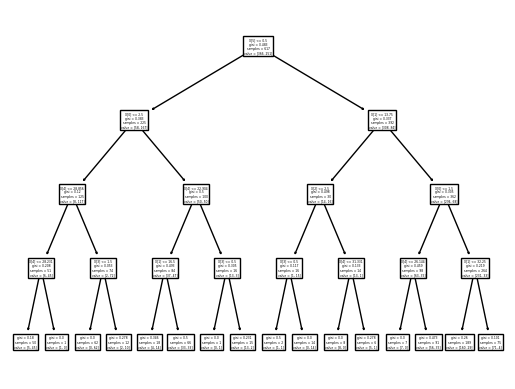

In [134]:
tree.plot_tree(model)

In [139]:
y_predict = model.predict(X_test)

In [140]:
def evaluation(y_test,y_predict):
    precision = precision_score(y_test,y_predict)
    accuracy = accuracy_score(y_test,y_predict)
    recall = recall_score(y_test,y_predict)
    return precision, accuracy, recall

In [143]:
precision, accuracy, recall = evaluation(y_test,y_predict)
print(f'''The precision value is: {precision}
The accuracy value is: {accuracy}
The recall value is: {recall}
''')

The precision value is: 0.94
The accuracy value is: 0.8451612903225807
The recall value is: 0.6911764705882353

